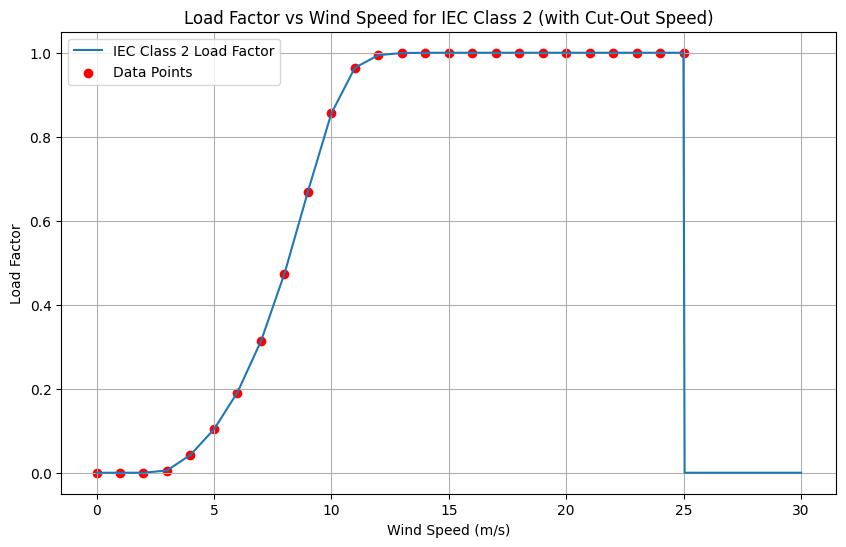

In [6]:
import numpy as np
import matplotlib.pyplot as plt

speed_bins = list(range(26))
iec_class_2_load_factors = [0, 0, 0, 0.0052, 0.0423, 0.1031, 0.1909, 0.3127, 0.4731, 0.6693, 0.8554, 0.9641, 0.9942, 0.9994, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Updated function to handle cut-out speed
def wind_speed_to_load_factor(speed):
    # Data for IEC Class 2
    speed_bins = list(range(26))
    iec_class_2_load_factors = [0, 0, 0, 0.0052, 0.0423, 0.1031, 0.1909, 0.3127, 0.4731, 0.6693, 0.8554, 0.9641, 0.9942, 0.9994, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

    if speed > 25:
        return 0
    return np.interp(speed, speed_bins, iec_class_2_load_factors)

# Generate a range of wind speeds for plotting, including values above 25 m/s
wind_speeds = np.linspace(0, 30, 600)
load_factors = [wind_speed_to_load_factor(speed) for speed in wind_speeds]

# Plot the curve with the updated function
plt.figure(figsize=(10, 6))
plt.plot(wind_speeds, load_factors, label='IEC Class 2 Load Factor')
plt.scatter(speed_bins, iec_class_2_load_factors, color='red', label='Data Points')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Load Factor')
plt.title('Load Factor vs Wind Speed for IEC Class 2 (with Cut-Out Speed)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
df

,Wind Speed (m/s),Power Output (kW)
0,3.5,21.713977
1,6.2,230.623633
2,8.0,700.000000
3,12.5,2011.763382
4,15.0,2000.000000
5,20.3,1998.863094


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windpowerlib import ModelChain, WindTurbine, create_turbine, get_turbine_data

# 定义风力涡轮机类型
turbine_data = get_turbine_data('enercon_e82_e2')  # 选择一个预定义的风力涡轮机类型

# 创建风力涡轮机对象
wind_turbine = WindTurbine(
    rotor_diameter=turbine_data['rotor_diameter'],
    hub_height=90,
    turbine_type='enercon_e82_e2'
)

# 定义环境数据（风速）
wind_speeds = np.linspace(0, 25, 100)
weather_data = pd.DataFrame({'wind_speed': wind_speeds})

# 初始化 ModelChain
modelchain = ModelChain(wind_turbine).run_model(weather_data)

# 获取功率输出
power_outputs = modelchain.power_output.values

# 绘制功率曲线
plt.figure(figsize=(10, 6))
plt.plot(wind_speeds, power_outputs, label='Power Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('Power Curve for a Wind Turbine')
plt.legend()
plt.grid(True)
plt.show()

# 示例风速数据
specific_wind_speeds = np.array([3.5, 6.2, 8.0, 12.5, 15.0, 20.3])
specific_power_outputs = np.interp(specific_wind_speeds, wind_speeds, power_outputs)

# 创建 DataFrame 以便更好地可视化
df = pd.DataFrame({'Wind Speed (m/s)': specific_wind_speeds, 'Power Output (kW)': specific_power_outputs})
print(df)

ImportError: cannot import name 'create_turbine' from 'windpowerlib' (/opt/miniconda3/envs/graphcast/lib/python3.10/site-packages/windpowerlib/__init__.py)